In [2]:
import pandas as pd
import numpy as np

from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
print(font_name)
rc('font', family=font_name)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib inline 
# %config InlineBackend.figure_format='retina'

Malgun Gothic


In [7]:
import pandas as pd
blind = pd.read_csv("data/전국 시도별 등록 청각 장애인(2016년).txt", sep=' ')#, index_col='행정구역별')
blind.iloc[1:,1:7]

import re
blind.iloc[:,4] = blind.iloc[:,4].apply(lambda x : re.sub("[,]", "", x)).map(int)
blind

,행정구역별,계(전체),남자(전체),여자(전체),계(전체).1,남자(전체).1,여자(전체).1
0,전국,"2,511,051","1,457,588","1,053,463",271843,"147,749","124,094"
1,서울특별시,"391,027","227,271","163,756",41887,"23,273","18,614"
2,부산광역시,"168,950","100,326","68,624",15077,"8,455","6,622"
3,대구광역시,"117,111","69,090","48,021",12829,"6,803","6,026"
4,인천광역시,"135,623","81,961","53,662",13995,"7,693","6,302"
5,광주광역시,"68,569","38,538","30,031",8537,"4,526","4,011"
6,대전광역시,"71,425","41,767","29,658",7879,"4,305","3,574"
7,울산광역시,"49,533","30,082","19,451",6353,"3,788","2,565"
8,세종특별자치시,"9,845","5,787","4,058",1111,587,524
9,경기도,"522,437","311,539","210,898",51459,"28,665","22,794"


In [ ]:
import json
geo_path = 'data/대한민국 시도 구분.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

import folium
map = folium.Map(location=[35.95, 128.25], zoom_start=7,
                 )
fmap=folium.Choropleth(geo_data = geo_str,
               data = blind.iloc[1:,],
               columns = ['행정구역별', '계(전체).1'],
               fill_color = 'YlGnBu',
               #threshold_scale=[0,1,2,3,4,5,30,35,40],
               key_on='properties.CTP_KOR_NM').add_to(map)
fmap.geojson.zoom_on_click = False

map.save('output/청각 장애인 단계구분도.html')
display(map)

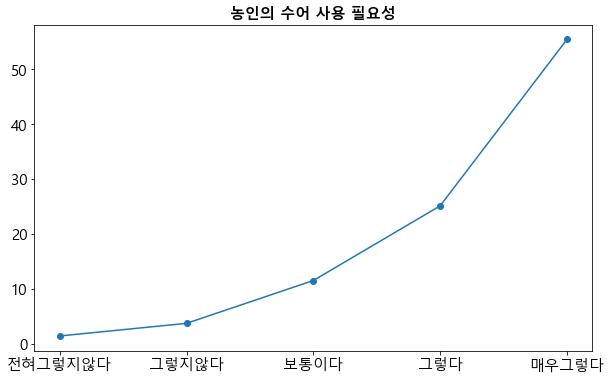

In [4]:
df1 = pd.read_csv('./data/농정체성__농인은_수어를_사용해야_한다2.csv', encoding="euc-kr")

df2 = df1.iloc[:,1:6]

plt.figure(figsize=(10,6))
plt.title('농인의 수어 사용 필요성', fontsize=15, fontweight='bold')
plt.plot(df2.T, '-o')
#plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("output/농인은 수어를 사용해야 한다.png")

plt.show()

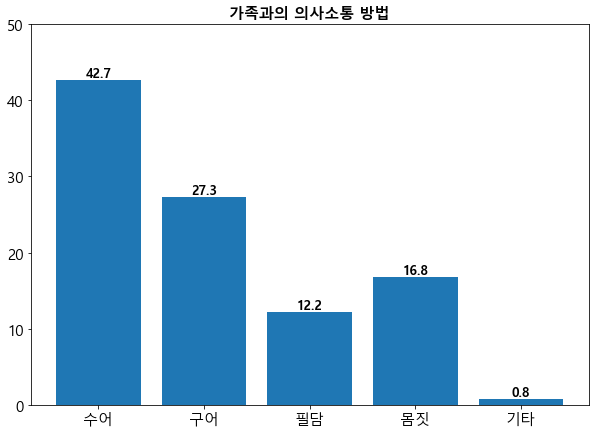

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

df1 = pd.read_csv('data/가족과의 의사소통 방법.csv')
df2 = df1.iloc[:,0:5]

colors = sns.color_palette('hls',len(df1.iloc[0,:].value_counts())) # 그래프 색 적용을 위한 팔레트

plt.figure(figsize=(10,7))
plt.title('가족과의 의사소통 방법', fontsize=15, fontweight='bold')
plt.bar(df2.columns, df2.iloc[0])
plt.ylim(0,50)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
for i in range(0,5):
    plt.text(i, df2.iloc[0,i], df2.iloc[0,i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 13,
             fontweight='bold',
             #color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
plt.savefig("output/가족과의 의사소통 방법.png")

plt.show()

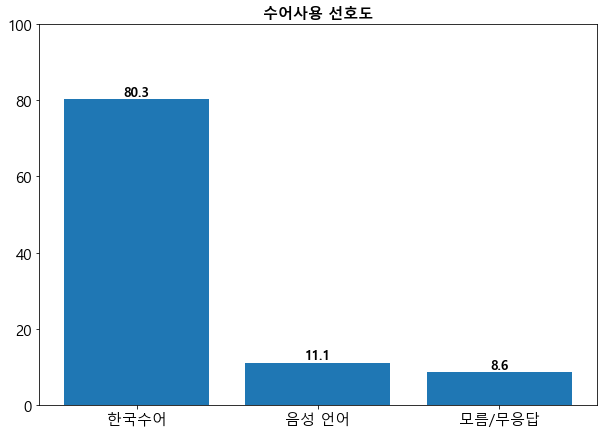

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

colors = sns.color_palette('hls',len(df1.iloc[0,:].value_counts())) # 그래프 색 적용을 위한 팔레트

df1 = pd.read_csv('./data/한국수어와 음성 언어 선호도.csv')
df2 = df1.iloc[:,0:4]

plt.figure(figsize=(10,7))
plt.title('수어사용 선호도', fontsize=15, fontweight='bold')
plt.bar(df2.columns, df2.iloc[0])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,100)
for i in range(0, 3):
    plt.text(i, df2.iloc[0,i], df2.iloc[0,i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 13,
             fontweight='bold',
             #color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.savefig("output/수어사용 선호도.png")
plt.show()

- 진료 내용 이해 정도
- 병원 이용 시 의사소통 방법 1순위/1+2+3순위
- 병원에서의 의사소통 지원이 우선적으로 필요한 상황 1순위/1+2순위

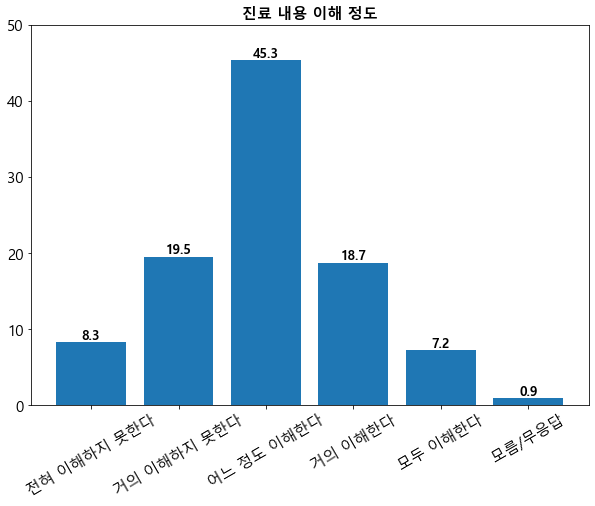

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/진료 내용 이해 정도.csv')
df.drop('사례 수(명)', axis=1, inplace = True)

plt.figure(figsize=(10,7))
plt.title('진료 내용 이해 정도', fontsize=15, fontweight='bold')
plt.bar(df.columns, df.iloc[0,:].values)
plt.xticks(fontsize=15, rotation=30)
plt.yticks(fontsize=15)
plt.ylim(0,50)
for i in range(0,6):
    plt.text(i, df.iloc[0,i], df.iloc[0,i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 13,
             fontweight='bold',
             #color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.savefig("output/진료 내용 이해 정도.png")
plt.show()

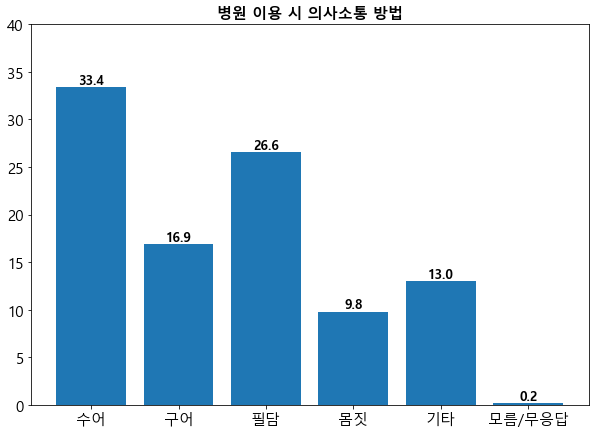

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/병원 이용 시 의사소통 방법 1순위.csv')
df.drop('사례 수(명)', axis=1, inplace = True)

plt.figure(figsize=(10,7))
plt.title('병원 이용 시 의사소통 방법', fontsize=15, fontweight='bold')
plt.bar(df.columns, df.iloc[0,:].values)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,40)
for i in range(0,6):
    plt.text(i, df.iloc[0,i], df.iloc[0,i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 13,
             fontweight='bold',
             #color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.savefig("output/병원 이용 시 의사소통 방법 1순위.png")
plt.show()

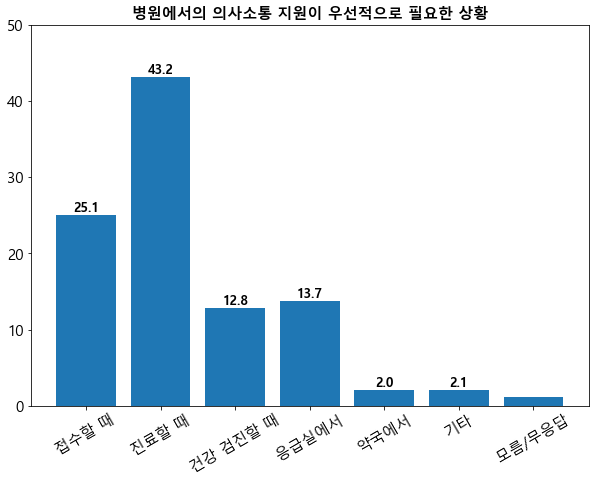

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/병원에서의 의사소통 지원이 우선적으로 필요한 상황 1순위.csv')
df.drop('사례 수(명)', axis=1, inplace = True)

plt.figure(figsize=(10,7))
plt.title('병원에서의 의사소통 지원이 우선적으로 필요한 상황', fontsize=15, fontweight='bold')
plt.bar(df.columns, df.iloc[0,:].values)
plt.xticks(fontsize=15,rotation=30)
plt.yticks(fontsize=15)
plt.ylim(0,50)
for i in range(0,6):
    plt.text(i, df.iloc[0,i], df.iloc[0,i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 13,
             fontweight='bold',
             #color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.savefig("output/병원에서의 의사소통 지원이 우선적으로 필요한 상황 1순위.png")
plt.show()

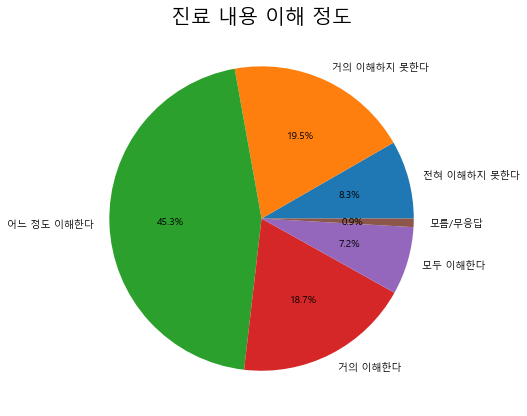

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/진료 내용 이해 정도.csv')
df.drop('사례 수(명)', axis=1, inplace = True)

plt.figure(figsize=(10,7))
plt.title('진료 내용 이해 정도', fontsize=20)
plt.pie(df.iloc[0], labels=df.columns, autopct='%.1f%%')
plt.savefig("output/진료 내용 이해 정도(파이).png")
plt.show()

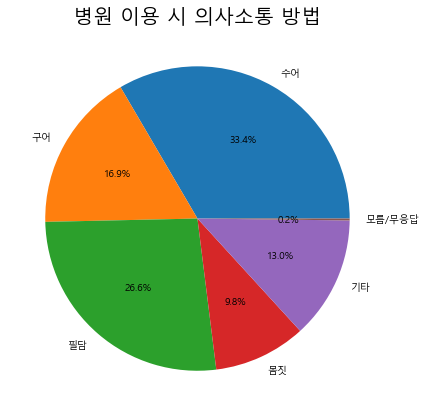

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/병원 이용 시 의사소통 방법 1순위.csv')
df.drop('사례 수(명)', axis=1, inplace = True)

plt.figure(figsize=(10,7))
plt.title('병원 이용 시 의사소통 방법', fontsize=20)
plt.pie(df.iloc[0], labels=df.columns, autopct='%.1f%%')
plt.savefig("output/병원 이용 시 의사소통 방법 1순위(파이).png")
plt.show()

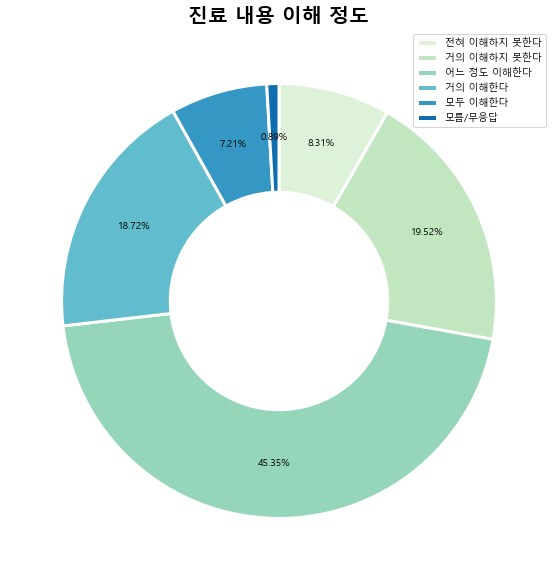

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
 

## 팔레트
custom_palette = sns.color_palette("GnBu", 6)
    
    
## 데이터 준비
df = pd.read_csv('data/진료 내용 이해 정도.csv')
df.drop('사례 수(명)', axis=1, inplace = True)
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
    
    
fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
#fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
plt.title('진료 내용 이해 정도', fontsize=20, fontweight='bold')
pie = ax.pie(df.iloc[0], ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       colors = custom_palette,
       wedgeprops=dict(width=0.5, linewidth=3, edgecolor='white'), ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       #explode = explode
       )
 
total = np.sum(df.iloc[0]) ## 빈도수 총합
 
sum_pct = 0 ## 백분율 초기값
for i,l in enumerate(df.columns):
    ang1, ang2 = pie[0][i].theta1, pie[0][i].theta2 ## 각1, 각2
    r = pie[0][i].r ## 원의 반지름
    
    x = ((r+0.5)/2)*np.cos(np.pi/180*((ang1+ang2)/2)) ## 정중앙 x좌표
    y = ((r+0.5)/2)*np.sin(np.pi/180*((ang1+ang2)/2)) ## 정중앙 y좌표
    
    if i < len(df.columns) - 1:
        sum_pct += float(f'{df.iloc[0][i]/total*100:.2f}') ## 백분율을 누적한다.
        ax.text(x,y,f'{df.iloc[0][i]/total*100:.2f}%',ha='center',va='center') ## 백분율 텍스트 표시
    else: ## 총합을 100으로 맞추기위해 마지막 백분율은 100에서 백분율 누적값을 빼준다.
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center') 
 
plt.legend(df.columns) ## 범례 표시
plt.savefig("output/진료 내용 이해 정도(도넛).png", dpi=500)
plt.show()

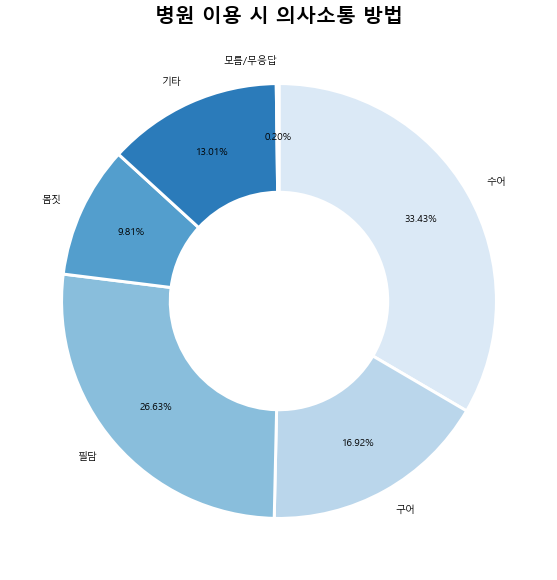

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
 

## 팔레트
custom_palette = sns.color_palette("Blues", 6)
    
    
## 데이터 준비
df = pd.read_csv('data/병원 이용 시 의사소통 방법 1순위.csv')
df.drop('사례 수(명)', axis=1, inplace = True)
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
    
    
fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
#fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
plt.title('병원 이용 시 의사소통 방법', fontsize=20, fontweight='bold')
pie = ax.pie(df.iloc[0], ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       colors = custom_palette,
       labels = df.columns,
       #labeldistance=1.05,
       wedgeprops=dict(width=0.5, linewidth=3, edgecolor='white'), ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
       #explode = explode
       )
 
total = np.sum(df.iloc[0]) ## 빈도수 총합
 
sum_pct = 0 ## 백분율 초기값
for i,l in enumerate(df.columns):
    ang1, ang2 = pie[0][i].theta1, pie[0][i].theta2 ## 각1, 각2
    r = pie[0][i].r ## 원의 반지름
    
    x = ((r+0.5)/2)*np.cos(np.pi/180*((ang1+ang2)/2)) ## 정중앙 x좌표
    y = ((r+0.5)/2)*np.sin(np.pi/180*((ang1+ang2)/2)) ## 정중앙 y좌표
    
    if i < len(df.columns) - 1:
        sum_pct += float(f'{df.iloc[0][i]/total*100:.2f}') ## 백분율을 누적한다.
        ax.text(x,y,f'{df.iloc[0][i]/total*100:.2f}%',ha='center',va='center') ## 백분율 텍스트 표시
    else: ## 총합을 100으로 맞추기위해 마지막 백분율은 100에서 백분율 누적값을 빼준다.
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center') 
 
# plt.legend(df.columns) ## 범례 표시
plt.savefig("output/병원 이용 시 의사소통 방법(도넛-Blues).png", dpi=500)
plt.show()

# ppt에 쓰일 그래프 정리